### **Business Understanding**

<img src="elephants-zebras.jpg" alt="unsplash" width="949" height="400">

<p>Image classification is a fundamental task in computer vision that involves assigning labels to images based on their content. In my project, I am focusing on distinguishing between two classes: elephants and zebras. This task has real-world applications in wildlife conservation, photography, and more.</p>

### **Data Understanding**

##### *i. Required modules*

In [1]:
# import necessary libraries
import os
import shutil
import hashlib
import matplotlib.pyplot as plt
from os import listdir
from numpy import save
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib.image import imread

2023-08-10 16:07:49.620155: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 16:07:49.672499: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 16:07:49.673600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 16:07:50.641325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


##### *ii. Check the number of images in the data folder*

In [2]:
# set folder path
folder = 'data/data/'

# List all files in the folder
files = os.listdir(folder)

# Filter image files based on their extensions
image_extensions = ('.jpg', '.jpeg', '.png')  # Add more extensions if needed
image_files = [file for file in files if file.lower().endswith(image_extensions)]

# Get the number of image files
num_images = len(image_files)

print(f"Number of image files in the folder: {num_images}")

Number of image files in the folder: 13998


##### *iii) plot the count of both zebra and elephant images*

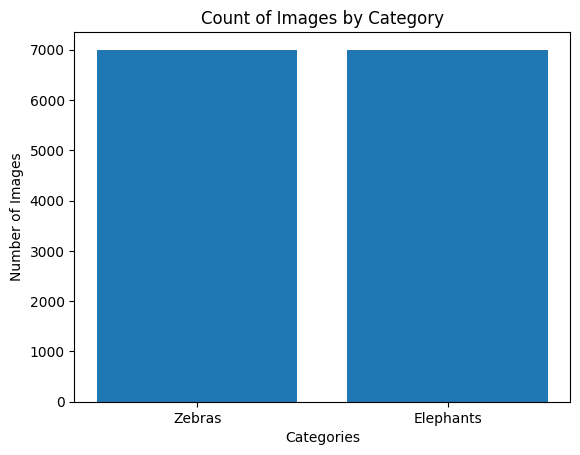

In [3]:
# check the amount of images
# List all files in the folder
files = os.listdir(folder)

# Filter image files based on their extensions and starting keywords
zebra_images = [file for file in files if file.lower().startswith('zebra') and file.lower().endswith(('.jpg', '.jpeg', '.png'))]
elephant_images = [file for file in files if file.lower().startswith('elephant') and file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Get the counts
num_zebras = len(zebra_images)
num_elephants = len(elephant_images)

# Plot the counts
categories = ['Zebras', 'Elephants']
counts = [num_zebras, num_elephants]

plt.bar(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Count of Images by Category')
plt.show()

##### *iv) plot elephant images*

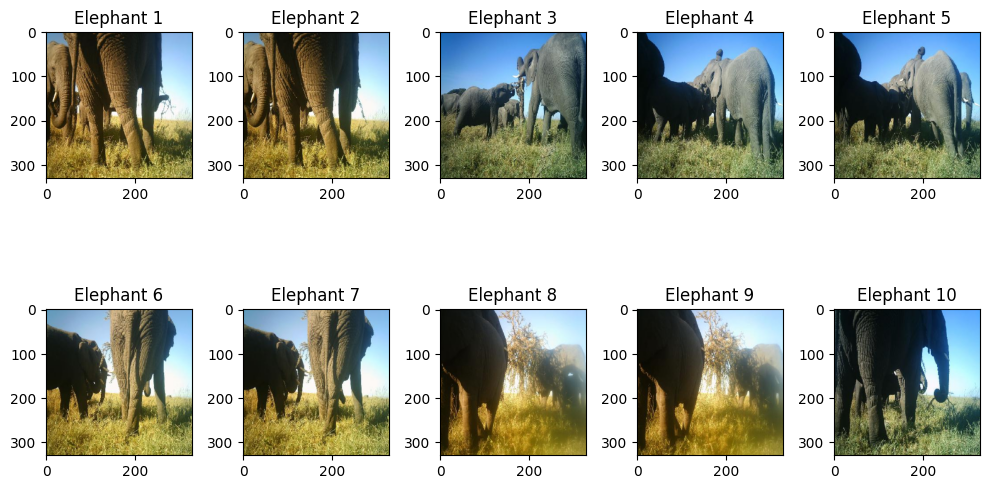

In [4]:
# plot the elephant images

# Create a subplot for each image
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot the first 10 images
for i in range(1, 11):  # Start from 1 to match subplot numbering
    plt.subplot(2, 5, i)  # 2 rows, 5 columns, i-th subplot
    # Define filename
    filename = os.path.join(folder, 'elephant.' + str(i) + '.jpg')
    # Load image pixels
    image = imread(filename)
    # Plot raw pixel data
    plt.imshow(image)
    plt.title('Elephant ' + str(i))  # Add a title

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

##### *v) plot zebra images*

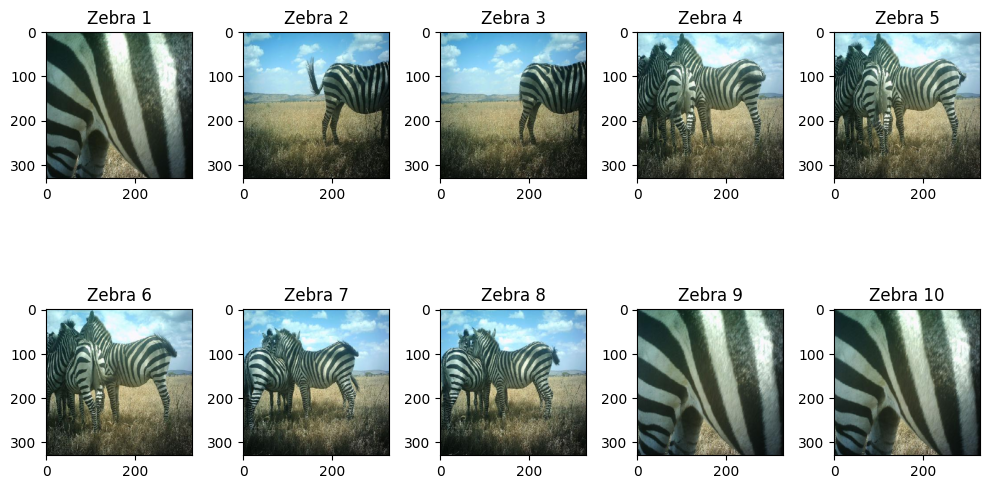

In [5]:
# plot the zebra images
# Create a subplot for each image
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot the first 10 images
for i in range(1, 11):  # Start from 1 to match subplot numbering
    plt.subplot(2, 5, i)  # 2 rows, 5 columns, i-th subplot
    # Define filename
    filename = os.path.join(folder, 'zebra.' + str(i) + '.jpg')
    # Load image pixels
    image = imread(filename)
    # Plot raw pixel data
    plt.imshow(image)
    plt.title('Zebra ' + str(i))  # Add a title

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

##### *vi) check for duplicates in the dataset*

In [6]:
# check for duplicates in the dataset
# define calculate hash
def calculate_hash(image_path, block_size=65536):
    hasher = hashlib.md5()
    with open(image_path, 'rb') as f:
        for chunk in iter(lambda: f.read(block_size), b''):
            hasher.update(chunk)
    return hasher.hexdigest()

# define find_duplicates
def find_duplicates(folder):
    image_hashes = {}
    duplicates = []

    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder, file)
            image_hash = calculate_hash(image_path)
            if image_hash in image_hashes:
                duplicates.append((file, image_hashes[image_hash]))
            else:
                image_hashes[image_hash] = file

    return duplicates

# get the number of duplicates
duplicates = find_duplicates(folder)

if duplicates:
    print("Duplicate images:")
    for duplicate_pair in duplicates:
        print(f"   {duplicate_pair[0]} is a duplicate of {duplicate_pair[1]}")
else:
    print("No duplicates found.")

No duplicates found.


### **Data Preparation**

### **Modelling**